<div align="center"> 

---

# **Behavioral metrics**

</div>


---

<div align="center"> 

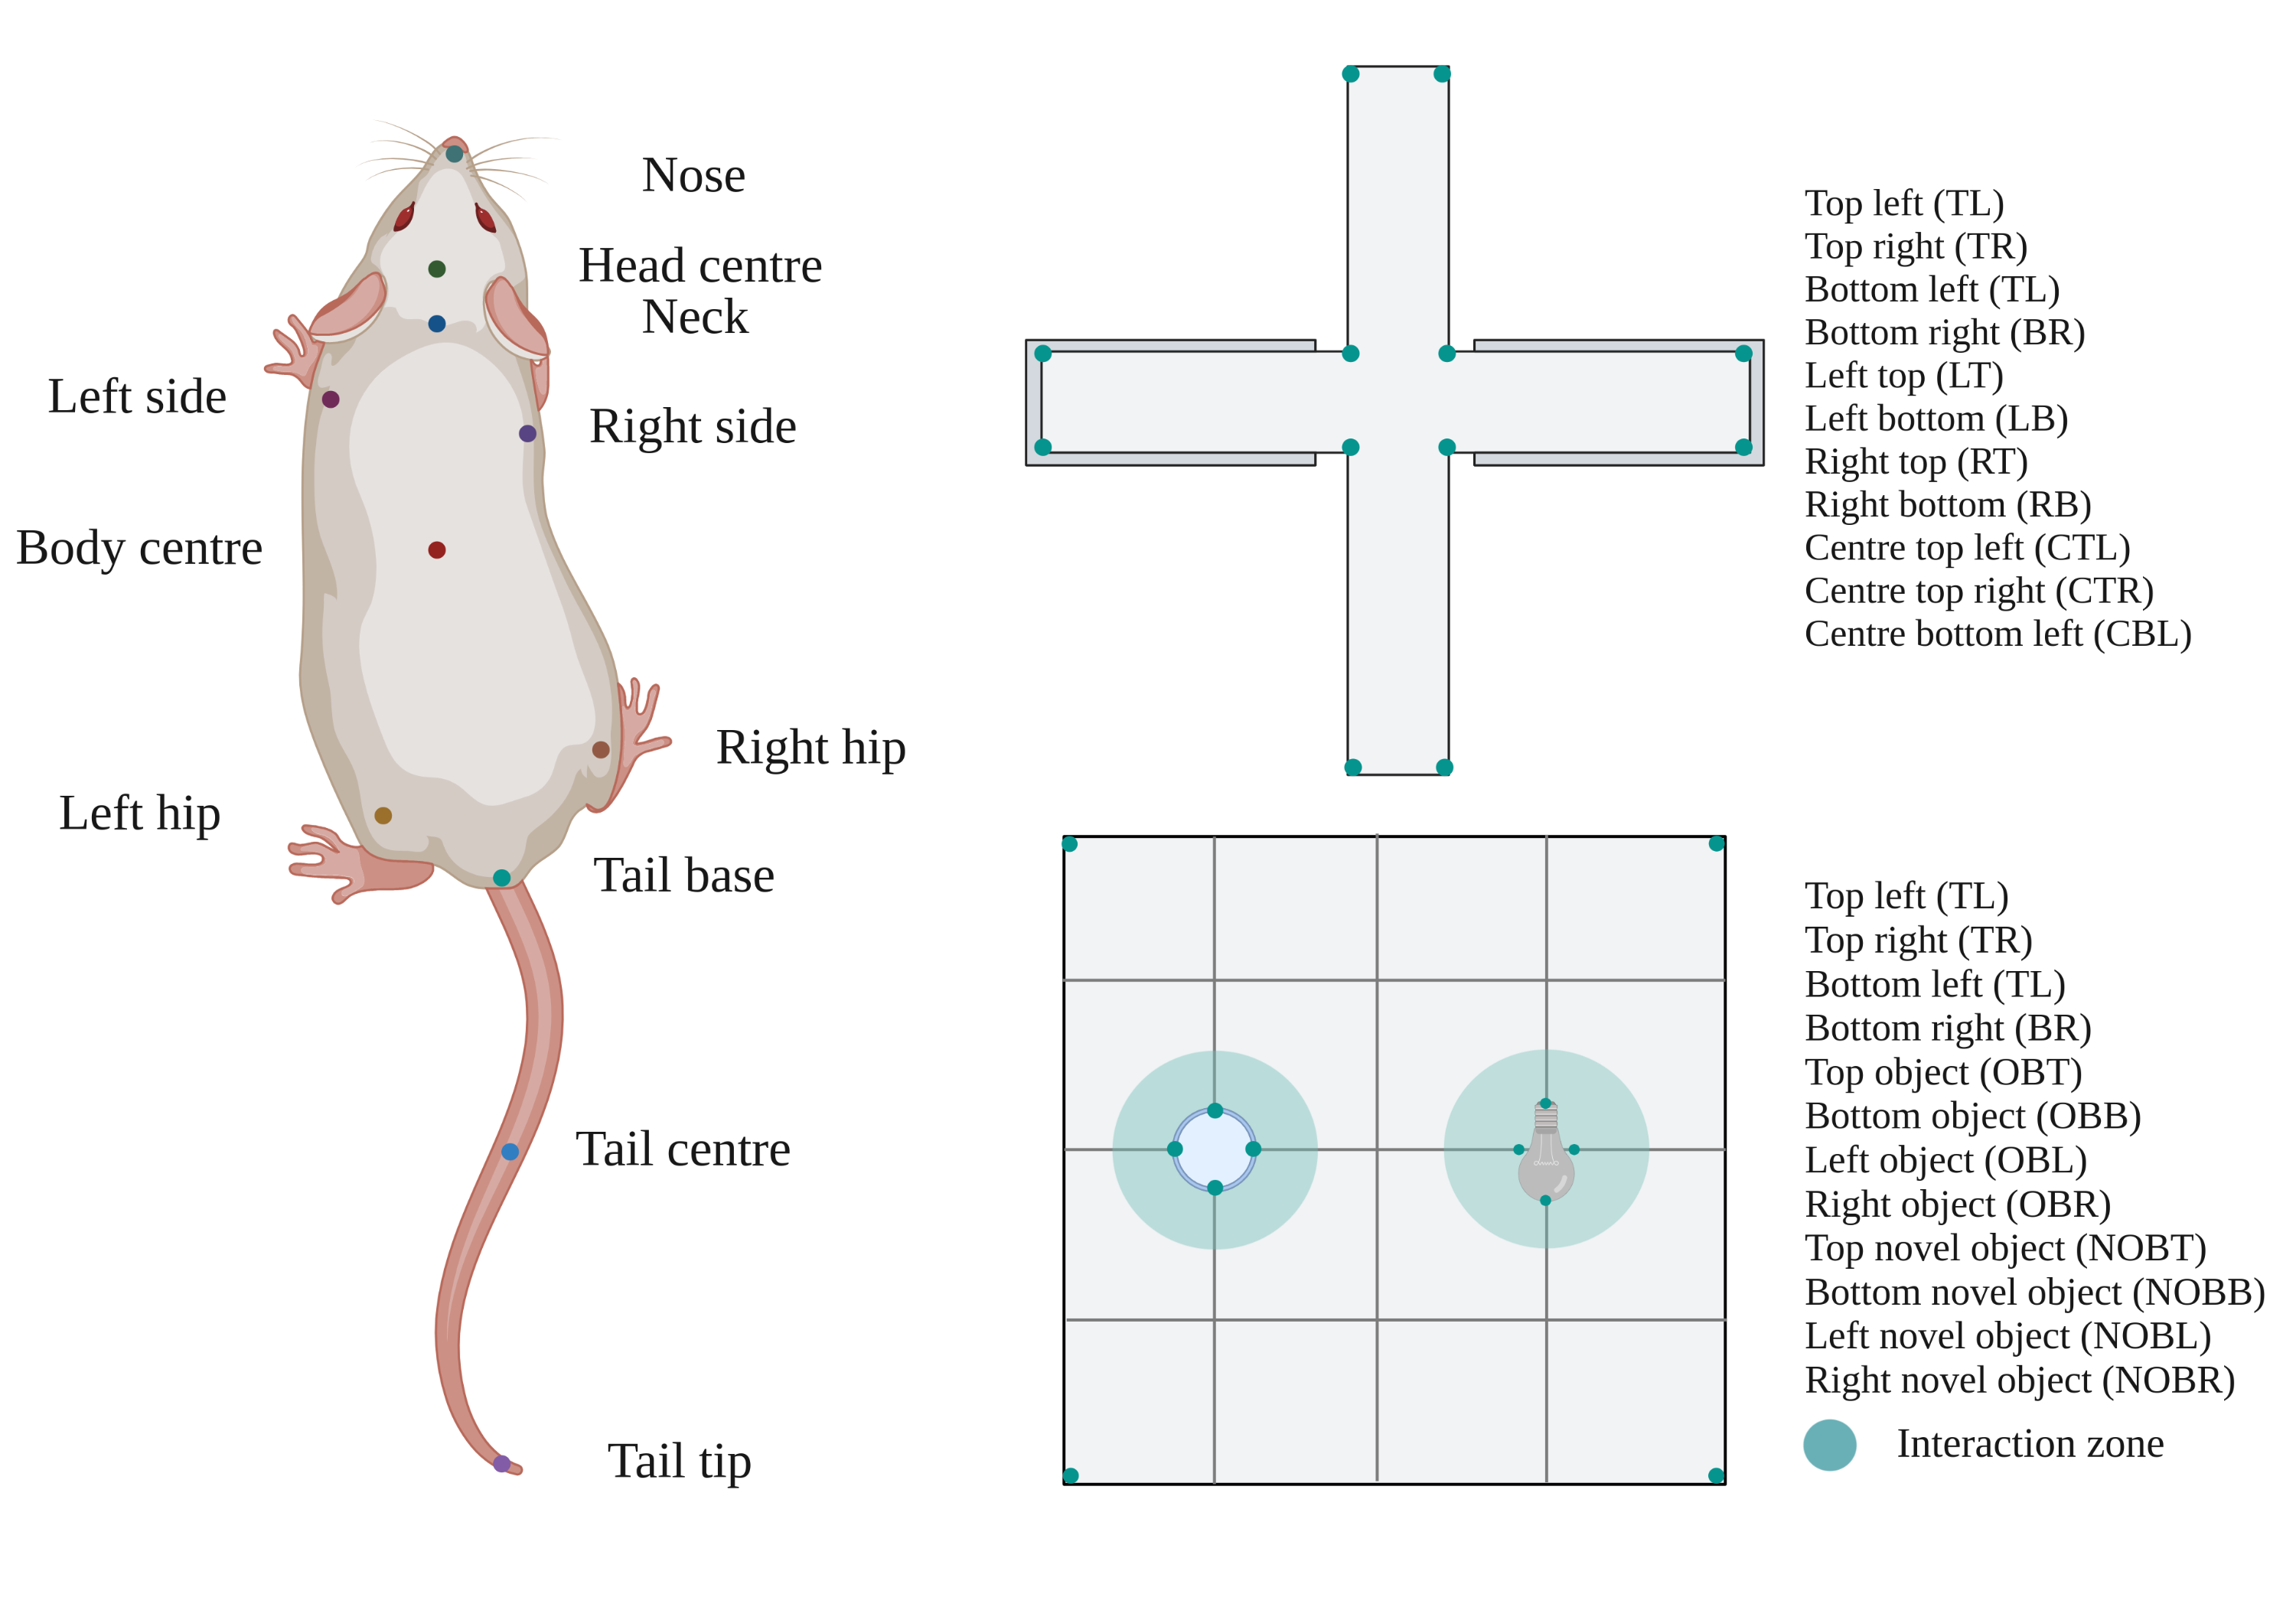

</div>

---
# <u> **Description:**</u>

Behavioral

---

## **Workflow**

0. Deeplabcut code
1. General preparation
2. Data preparation
3. Analysis
4. Exploratory data analysis
5. Visualization
6. Export data

---

**Variables to consider:** 
  - Session
  - Sex  
  
**Tasks:**
  - Elevated plus maze
  - Novel object recognition
  
**Analysis:**
  - 
  - 

---

### **General settings options**

In [1]:
addTaskCallback(function(...) {set.seed(42);TRUE})
options(warn=-1) # to turn off warnings
#options(warn=0) # to turn on warnings
options(repr.plot.width=14, repr.plot.height=10) # to resize plots

1 
1

In [2]:
setwd("../")

## **0. Deeplabcut code**

The raw and labelled videos can be found in:


We trained a neural network for each behavioral task, the code for running it into a HCP cluster and the options for it are:
  
[bash script](https://github.com/psilantrolab/Sudmex-alcohol-rat/blob/main/code/DLC/run_dlc.sh)   
[dlc commands](https://github.com/psilantrolab/Sudmex-alcohol-rat/blob/main/code/DLC/dlc_commands.py)

We created a neural network using the following bodyparts/maze labels:
- tl = top left
- tr = top right
- bl = bottom left
- br = bottom right
- obt = object top
- obb = object bottom
- obl = object left
- obr = object right
- nobt = novel object top
- nobb = novel object bottom
- nobl = novel object left
- nobr = novel object right
- nose
- headcentre
- neck
- bodycentre
- bcl = bodycentre left
- bcr = bodycentre right
- hipl = left hip
- hipr = right hip
- tailbase
- tailcentre
- tailtip

Config files to train the networks:
[Config EPM](https://github.com/psilantrolab/Sudmex-alcohol-rat/blob/main/code/DLC/config_EPM.yaml)   
[Config NOR](https://github.com/psilantrolab/Sudmex-alcohol-rat/blob/main/code/DLC/config_NOR.yaml) 

1. Once we trained the net, we tested for automatic tracking of each rat on each behavioral task
2. We exported the tracking to csv files
3. Using DLCAnalyzer we extracted the metrics of interest (https://www.nature.com/articles/s41386-020-0776-y)
    - EPM: Using the scripts (https://github.com/ETHZ-INS/DLCAnalyzer)
    - NOR: a modified script of DLC [script](https://github.com/psilantrolab/Sudmex-alcohol-rat/blob/main/code/DLC/DLCAnalyzer_NOR.R)

## **1. General preparation**

### **1.1 Load  R packages and dependencies.** 

  The following packages are needed for the to move on, firstly it is needed to download pacman library

 ---

In [3]:
# Make sure to install pacman before we begin
  if (!require("pacman")) {
  install.packages("pacman")
  }

# Load required packages  
  pacman::p_load(tidyverse,readxl,Matrix,lme4,devtools,ggpubr,rstatix,ggdist,sp,imputeTS,ggmap,data.table,cowplot,corrplot,keras,magrittr,gghalves,skimr,emmeans,multcomp,easystats)


Loading required package: pacman



In [4]:
# Run DLCAnalyzer scripts
source("code/DLC/DLCAnalyzer_NOR.R")

In [5]:
pal_batch <- c("#264653","#2a9d8f","#5e548e","#ff595e","#03045e")

### **1.1 Files**

For EPM, the files are: 

- EPM: T1 and T2: {Batch}_EPM_{RID}_{Time}DLC_resnet50_EPMMar18shuffle1_{train_cycle}

For NOR, the files are:
- NOR: T1 and T2: {Batch}_{RID}_{Phase}DLC_resnet50_ORApr27shuffle1_{train_cycle}

---

---

# **Elevated plus maze**

---

## **2. Data preparation**

Reading files and set it all up.

Firstly, run the functions made by Sturman et al, (2020) and the modified function for NOR, the script is in:

[script](https://github.com/psilantrolab/Sudmex-alcohol-rat/blob/main/code/DLCAnalyzer_NOR.R)

Secondly, create the function to read, calibrating and analysis of the tracking accordingly with each batch recording (camera parameters)

Frames per second (fps):
- Batch 1: 7.5 and 22.5
- Batch 2: 7.5
- Batch 3: 30
- Batch 4: 15
- Batch 5: 15

#### Important: 

The bodycenter is the point-label to consider if the rat is in which arm

In [6]:
T1_input_folder <- paste0(getwd(),"/Data/Behavior/EPM_f/T1/")
T2_input_folder <- paste0(getwd(),"/Data/Behavior/EPM_f/T2/")
T12_input_folder <- paste0(getwd(),"/Data/Behavior/EPM_f/T12/")
T3_input_folder <- paste0(getwd(),"/Data/Behavior/EPM_f/T3/")


### **2.1 Create functions accordingly with each batch**

#### **2.1.1 Cut the duration of the videos**

In [7]:
# Create function ---------------------------------------------------------

pipeline <- function(path){
  Tracking <- ReadDLCDataFromCSV(file = path, fps = 14)
  Tracking <- CutTrackingData(Tracking,start = 100, end = 250)
  Tracking <- CalibrateTrackingData(Tracking, method = "distance",in.metric = 65.5, points = c("tl","br"))
  zoneinfo <- read.table(paste0(getwd(),"/code/DLC/EPM_zoneinfo.csv"), sep = ",", header = T)
  Tracking <- AddZones(Tracking,zoneinfo)
  Tracking <- CleanTrackingData(Tracking, likelihoodcutoff = 0.95,existence.pol = ScalePolygon(Tracking$zones$arena, 1.8))
  Tracking <- EPMAnalysis(Tracking, movement_cutoff = 5,integration_period = 5,points = "bodycentre", nosedips = TRUE)
  return(Tracking)
}

pipeline2 <- function(path){
  Tracking <- ReadDLCDataFromCSV(file = path, fps = 62)
  Tracking <- CutTrackingData(Tracking,start = 100, end = 250)
  Tracking <- CalibrateTrackingData(Tracking, method = "distance",in.metric = 65.5, points = c("tl","br"))
  zoneinfo <- read.table(paste0(getwd(),"/code/DLC/EPM_zoneinfo.csv"), sep = ",", header = T)
  Tracking <- AddZones(Tracking,zoneinfo)
  Tracking <- CleanTrackingData(Tracking, likelihoodcutoff = 0.95,existence.pol = ScalePolygon(Tracking$zones$arena, 1.8))
  Tracking <- EPMAnalysis(Tracking, movement_cutoff = 5,integration_period = 5,points = "bodycentre", nosedips = TRUE)
  return(Tracking)
}

### **2.2 Analyze tracking with DLC analyzer**

In [ ]:
# Batch 2

### T1 ###

B2_files_T1 <- list.files(T1_input_folder, pattern = "T1", recursive = T)

B2_TrackingAll_T1 <- RunPipeline(B2_files_T1,T1_input_folder,FUN = pipeline)
B2_Report_T1 <- MultiFileReport(B2_TrackingAll_T1) 

### T2 ###

B2_files_T2 <- list.files(T2_input_folder, pattern = "T2", recursive = T)

B2_TrackingAll_T2 <- RunPipeline(B2_files_T2,T2_input_folder,FUN = pipeline)
B2_Report_T2 <- MultiFileReport(B2_TrackingAll_T2) 

### T3 ###

B2_files_T3 <- list.files(T3_input_folder, pattern = "T3", recursive = T)

B2_TrackingAll_T3 <- RunPipeline(B2_files_T3,T3_input_folder,FUN = pipeline)
B2_Report_T3 <- MultiFileReport(B2_TrackingAll_T3) 
    

In [ ]:
### T12 ###

B2_files_T12 <- list.files(T12_input_folder, recursive = T)

B2_TrackingAll_T12 <- RunPipeline(B2_files_T12,T12_input_folder,FUN = pipeline2)
B2_Report_T12 <- MultiFileReport(B2_TrackingAll_T12) 

### **2.3 Binding and arranging**

In [10]:
B2_Report_T1 <- B2_Report_T1 %>% 
            add_column(RID = str_split(B2_Report_T1$file,n = 2, pattern = "DLC") %>% 
                                    map_chr(~ .x %>% extract(1)),.before = 1)

B2_Report_T2 <- B2_Report_T2 %>% 
            add_column(RID = str_split(B2_Report_T2$file,n = 2, pattern = "DLC") %>% 
                                    map_chr(~ .x %>% extract(1)),.before = 1)

B2_Report_T3 <- B2_Report_T3 %>% 
            add_column(RID = str_split(B2_Report_T3$file,n = 2, pattern = "DLC") %>% 
                                    map_chr(~ .x %>% extract(1)),.before = 1)

B2_Report_T12 <- B2_Report_T12 %>% 
            add_column(RID = str_split(B2_Report_T12$file,n = 2, pattern = "DLC") %>% 
                                    map_chr(~ .x %>% extract(1)),.before = 1)

In [11]:
Report_DLC <-  rbind(B2_Report_T1,B2_Report_T2,B2_Report_T3,B2_Report_T12) %>% dplyr::select(c("RID","bodycentre.center.total.time","bodycentre.open.total.time",
                                "bodycentre.closed.total.time","bodycentre.open.transitions","bodycentre.closed.transitions"))

## **3. Analysis**

### **3.1 Time in each arms**

In [12]:
EPM_timeArms <- Report_DLC %>% dplyr::select(c("RID","bodycentre.open.total.time",
                            "bodycentre.closed.total.time")) %>% 
              pivot_longer(cols = c(bodycentre.open.total.time, bodycentre.closed.total.time), 
                            names_to = "Arm", values_to = "Time") %>% 
              mutate(RID = factor(RID),
              Arm = case_when(Arm == "bodycentre.open.total.time" ~ "Open",
                            Arm == "bodycentre.closed.total.time" ~ "Closed")) %>% 
              pivot_wider(names_from = Arm, values_from = Time) %>% 
              mutate(resta = (Closed-Open),
                     suma = (Open+Closed),
                     PI = if_else(is.nan(Closed/suma),0,(Closed/suma))) %>% na.omit() 

### **3.2 Entries in each arms**

In [13]:
EPM_entries <- Report_DLC %>% 
              pivot_longer(cols = c(bodycentre.open.transitions, bodycentre.closed.transitions), 
                            names_to = "Arm_entries", values_to = "Entries") %>%
              mutate(RID = factor(RID),
              Arm_entries = factor(Arm_entries),
              Arm_entries = case_when(Arm_entries == "bodycentre.open.transitions" ~ "Open_entries",
                                   Arm_entries == "bodycentre.closed.transitions" ~ "Closed_entries")) %>% 
              pivot_wider(names_from = Arm_entries, values_from = Entries) %>% 
              mutate(resta_entries = (Closed_entries-Open_entries),
                     suma_entries = (Open_entries+Closed_entries),
                     PI_entries = if_else(is.nan(Closed_entries/suma_entries),0,(Closed_entries/suma_entries))) %>% 
              na.omit() 

### **3.3 Anxiety index**

Anxiety Index = 1 − ([Open arm time/Test duration] + [Open arms entries/Total number of entries]/2)

In [14]:
EPM_AI <- left_join(EPM_timeArms,EPM_entries) %>% 
        mutate(Anxiety_index = ( 1- ((PI) + (PI_entries)) / 2 ) ) 

Joining with `by = join_by(RID)`


In [ ]:
EPM_AI %>% dplyr::select(c(RID,PI,PI_entries,Anxiety_index))

In [17]:
EPM_AI %>% dplyr::select(c(RID,PI,PI_entries,Anxiety_index)) %>% left_join(rbind(B2_Report_T1,B2_Report_T2,B2_Report_T3,B2_Report_T12) %>% 
    dplyr::select(- c(file)), by = "RID") %>% write_csv(paste0(getwd(),"/Data/Behavior/EPM_f/tracked.csv"))

---
# **Novel object recognition**
---

## **2. Data preparation**

Reading files and set it all up.

Firstly, run the functions made by Sturman et al, (2020) and the modified function for NOR, the script is in:

[script](https://github.com/psilantrolab/Sudmex-alcohol-rat/blob/main/code/DLCAnalyzer_NOR.R)

Secondly, create the function to read, calibrating and analysis of the tracking accordingly with each batch recording (camera parameters)

Frames per second (fps):
- Batch 1: 7.5
- Batch 2: 30
- Batch 3: 7.5
- Batch 4: 7.5
- Batch 5: 16.6

#### Important: 

The nose is the point to consider if the rat is in which object

In [17]:
NOR_input_folder <- paste0(getwd(),"/Data/Behavior/NOR/NOR_mar/")

DLCmetrics_selectionNOR <- c('file', 'nose.ob.distance.moving', 'nose.ob.speed.moving','nose.ob.time.moving', 
                            'nose.ob.total.time', 'nose.ob.time.stationary','nose.ob.transitions','nose.nob.distance.moving', 'nose.nob.speed.moving',
                            'nose.nob.time.moving', 'nose.nob.total.time', 'nose.nob.time.stationary','nose.nob.transitions')

### **2.1 Create functions accordingly with each batch**

In [18]:
# Create function ---------------------------------------------------------

ROpipeline_1 <- function(path){
    Tracking <- ReadDLCDataFromCSV(file = path, fps = 20)
    Tracking <- CleanTrackingData(Tracking, likelihoodcutoff = 0.95)
    Tracking <- CalibrateTrackingData(Tracking, "area",in.metric = 42*42, points = c("tl","tr","br","bl"))
    PlotPointData(Tracking, points = c("nose"))
    zoneinfo <- read.table(paste0(getwd(),"/code/DLC/RO.csv"), sep = ";", header = T)
    Tracking <- AddZones(Tracking,zoneinfo)
    Tracking <- objet(Tracking, 7)
    Tracking <- CleanTrackingData(Tracking, likelihoodcutoff = 0.95,existence.pol = ScalePolygon(Tracking$zones$arena, 1.2))
    Tracking <- AnalysisRO(Tracking, movement_cutoff = 4,integration_period = 5,points = "nose", nosedips = FALSE)
    return(Tracking)
  }

ROpipeline_2 <- function(path){
    Tracking <- ReadDLCDataFromCSV(file = path, fps = 30)
    Tracking <- CleanTrackingData(Tracking, likelihoodcutoff = 0.95)
    Tracking <- CalibrateTrackingData(Tracking, "area",in.metric = 42*42, points = c("tl","tr","br","bl"))
    PlotPointData(Tracking, points = c("nose"))
    zoneinfo <- read.table(paste0(getwd(),"/code/DLC/RO.csv"), sep = ";", header = T)
    Tracking <- AddZones(Tracking,zoneinfo)
    Tracking <- objet(Tracking, 7)
    Tracking <- CleanTrackingData(Tracking, likelihoodcutoff = 0.95,existence.pol = ScalePolygon(Tracking$zones$arena, 1.2))
    Tracking <- AnalysisRO(Tracking, movement_cutoff = 4,integration_period = 5,points = "nose", nosedips = FALSE)
    return(Tracking)
  }

ROpipeline_5 <- function(path){
    Tracking <- ReadDLCDataFromCSV(file = path, fps = 15)
    Tracking <- CleanTrackingData(Tracking, likelihoodcutoff = 0.95)
    Tracking <- CalibrateTrackingData(Tracking, "area",in.metric = 42*42, points = c("tl","tr","br","bl"))
    PlotPointData(Tracking, points = c("nose"))
    zoneinfo <- read.table(paste0(getwd(),"/code/DLC/RO.csv"), sep = ";", header = T)
    Tracking <- AddZones(Tracking,zoneinfo)
    Tracking <- objet(Tracking, 7)
    Tracking <- CleanTrackingData(Tracking, likelihoodcutoff = 0.95,existence.pol = ScalePolygon(Tracking$zones$arena, 1.2))
    Tracking <- AnalysisRO(Tracking, movement_cutoff = 4,integration_period = 5,points = "nose", nosedips = FALSE)
    return(Tracking)
  }

### **2.2 Analyze tracking with DLC analyzer**

In [19]:
fps20=c(35,37,38,39,41,42,43,45,46,48,49) #ROpipeline_1

# Create a pattern string that matches any number in fps20
fps20_pattern <- paste(fps20, collapse = "|")

### NOR ###

# Use the pattern in list.files
B1_files_NOR <- list.files(NOR_input_folder, pattern = fps20_pattern, recursive = T)
B1_TrackingAll_NOR <- RunPipeline(B1_files_NOR,NOR_input_folder,FUN = ROpipeline_1)
B1_Report_NOR <- MultiFileReport(B1_TrackingAll_NOR) 

[1] "interpolating points with likelihood < 0.95"
[1] "interpolating points with likelihood < 0.95"
[1] "interpolating points which are outside of the existence area"
[1] "interpolating points with likelihood < 0.95"
[1] "interpolating points with likelihood < 0.95"
[1] "interpolating points which are outside of the existence area"
[1] "interpolating points with likelihood < 0.95"
[1] "interpolating points with likelihood < 0.95"
[1] "interpolating points which are outside of the existence area"
[1] "interpolating points with likelihood < 0.95"
[1] "interpolating points with likelihood < 0.95"
[1] "interpolating points which are outside of the existence area"
[1] "interpolating points with likelihood < 0.95"
[1] "interpolating points with likelihood < 0.95"
[1] "interpolating points which are outside of the existence area"
[1] "interpolating points with likelihood < 0.95"
[1] "interpolating points with likelihood < 0.95"
[1] "interpolating points which are outside of the existence area

In [20]:
fps15=c(18,20,21,25,27,29) #ROpipeline_5

# Create a pattern string that matches any number in fps20
fps15_pattern <- paste(fps15, collapse = "|")

### NOR ###

# Use the pattern in list.files
B2_files_NOR <- list.files(NOR_input_folder, pattern = fps15_pattern, recursive = F)
B2_TrackingAll_NOR <- RunPipeline(B2_files_NOR,NOR_input_folder,FUN = ROpipeline_5)
B2_Report_NOR <- MultiFileReport(B2_TrackingAll_NOR) 

[1] "interpolating points with likelihood < 0.95"
[1] "interpolating points with likelihood < 0.95"
[1] "interpolating points which are outside of the existence area"
[1] "interpolating points with likelihood < 0.95"
[1] "interpolating points with likelihood < 0.95"
[1] "interpolating points which are outside of the existence area"
[1] "interpolating points with likelihood < 0.95"
[1] "interpolating points with likelihood < 0.95"
[1] "interpolating points which are outside of the existence area"
[1] "interpolating points with likelihood < 0.95"
[1] "interpolating points with likelihood < 0.95"
[1] "interpolating points which are outside of the existence area"
[1] "interpolating points with likelihood < 0.95"
[1] "interpolating points with likelihood < 0.95"
[1] "interpolating points which are outside of the existence area"
[1] "interpolating points with likelihood < 0.95"
[1] "interpolating points with likelihood < 0.95"
[1] "interpolating points which are outside of the existence area

In [21]:
fps30=c(22,26,28,30) #ROpipeline_2

# Create a pattern string that matches any number in fps20
fps30_pattern <- paste(fps30, collapse = "|")

### NOR ###

# Use the pattern in list.files
B3_files_NOR <- list.files(NOR_input_folder, pattern = fps30_pattern, recursive = T)
B3_TrackingAll_NOR <- RunPipeline(B3_files_NOR,NOR_input_folder,FUN = ROpipeline_2)
B3_Report_NOR <- MultiFileReport(B3_TrackingAll_NOR) 

[1] "interpolating points with likelihood < 0.95"
[1] "interpolating points with likelihood < 0.95"
[1] "interpolating points which are outside of the existence area"
[1] "interpolating points with likelihood < 0.95"
[1] "interpolating points with likelihood < 0.95"
[1] "interpolating points which are outside of the existence area"
[1] "interpolating points with likelihood < 0.95"
[1] "interpolating points with likelihood < 0.95"
[1] "interpolating points which are outside of the existence area"
[1] "interpolating points with likelihood < 0.95"
[1] "interpolating points with likelihood < 0.95"
[1] "interpolating points which are outside of the existence area"


### **2.3 Binding and arranging**

In [22]:
Report_NOR <- rbind.data.frame(B1_Report_NOR,B2_Report_NOR,B3_Report_NOR) 
NOR_Report_DLC <- Report_NOR %>% 
            add_column(RID = paste0("sub-", str_split(Report_NOR$file, n = 4, pattern = "_") %>% 
                                    map_chr(~ .x %>% extract(1))) ,.before = 1) 


## **3. Analysis**


### **3.1 Novel object recognition**

In [23]:
NOR_timeObj <- NOR_Report_DLC %>% dplyr::select(RID,nose.ob.total.time,nose.nob.total.time) %>%
              pivot_longer(cols = c(nose.ob.total.time, nose.nob.total.time), 
                            names_to = "Object", values_to = "Time") %>%
              mutate(RID = factor(RID),
              Object = factor(Object),
              Object = case_when(Object == "nose.ob.total.time" ~ "Familiar",
                                   Object == "nose.nob.total.time" ~ "Novel")) %>% 
              pivot_wider(names_from = Object, values_from = Time) %>% 
              mutate(resta = (Novel-Familiar),
                     suma = (Novel+Familiar),
                     PI = if_else(is.nan(Novel/suma),0,(Novel/suma))) %>% na.omit() 

In [24]:
NOR_entries <- NOR_Report_DLC %>% dplyr::select(RID,nose.ob.transitions,nose.nob.transitions) %>%
              pivot_longer(cols = c(nose.ob.transitions, nose.nob.transitions	), 
                            names_to = "Obj_entries", values_to = "Entries") %>%
              mutate(RID = factor(RID),
              Obj_entries = factor(Obj_entries),
              Obj_entries = case_when(Obj_entries == "nose.ob.transitions" ~ "Familiar_entries",
                                   Obj_entries == "nose.nob.transitions" ~ "Novel_entries")) %>% 
              pivot_wider(names_from = Obj_entries, values_from = Entries) %>% 
              mutate(resta_entries = (Novel_entries-Familiar_entries),
                     suma_entries = (Familiar_entries+Novel_entries),
                     PI_entries = if_else(is.nan(Novel_entries/suma_entries),0,(Novel_entries/suma_entries))) %>% na.omit() 

### **3.2 Interaction index**

In [25]:
NOR_II <- left_join(NOR_timeObj,NOR_entries) %>% mutate(Interaction_index = (( ((PI) + (PI_entries)) / 2 ) ) ) 

Joining with `by = join_by(RID)`


In [26]:
NOR_II %>% dplyr::select(c(RID,PI,PI_entries,Interaction_index)) %>% left_join(NOR_Report_DLC %>% dplyr::select(- c(file)), by = "RID") %>% write_csv(paste0(getwd(),"/Data/Behavior/NOR/nor_mar.csv"))